# **Curso Visualização de Dados USP**

## **1.0 Importando as bibliotecas do Python**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
data = pd.read_csv('/home/naina/Projects/Python/usp/data/CompanhiaMB.csv')
data2 = pd.read_csv('/home/naina/Projects/Python/usp/data/dados_banco.csv')

In [3]:
data.head()

,funcionario,estado_civil,instrucao,nfilhos,salario,idade_anos,idade_meses,regiao
0,1,solteiro,ensino_fundamental,NaN,4.00,26,3,interior
1,2,casado,ensino_fundamental,1.0,4.56,32,10,capital
2,3,casado,ensino_fundamental,2.0,5.25,36,5,capital
3,4,solteiro,ensino_medio,NaN,5.73,20,10,outro
4,5,solteiro,ensino_fundamental,NaN,6.26,40,7,outro


## **2.1 Classificando os dados**
    **funcionario: qualitativa ordinal são numeros inteiros mas classificam o funcionarios não podem ser feitas operações com esses valores
    **estado_civil: qualitativa nominal
    **instrucao: qualitativa ordinal
    **nfilhos: quantitativa discreta
    **salario: quantitativa continua
    **idade_anos: quantitativa discreta
    **idade_meses: quantitativa discreta
    **regiao: qualitativa nominal

In [4]:
data2.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
0,75928,M,32,Privada,5719.00,933.79,0.0,0.0,6023.68,0
1,52921,F,28,Privada,5064.00,628.37,0.0,0.0,1578.24,0
2,8387,F,24,Autônomo,4739.00,889.18,0.0,0.0,2578.70,0
3,54522,M,30,Pública,5215.00,1141.47,0.0,0.0,4348.96,0
4,45397,M,30,Autônomo,5215.56,520.70,0.0,0.0,1516.78,1


## **2.2 Classificando os dados**
    **cliente: qualitaiva ordinal
    **sexo: qualitativa nominal
    **idade: quantitativa discreta
    **empresa: qualitativa nominal
    **salario: quantitativa continua
    **saldo_cc: quantitativa continua
    **saldo_poupanca: quantitativa continua
    **saldo_investimento: quantitativa continua
    **devedor_cartao: quantitativa continua
    **inadimplente: qualitativa nominal embora seja numerico trata-se de uma variavel booleana

In [5]:
#tabela de frequencia absoluta
tab_abs = data['estado_civil'].value_counts()
tab_abs

estado_civil
casado      20
solteiro    16
Name: count, dtype: int64

In [6]:
#tabela de frequencia relativa
tab_rel = (data['estado_civil'].value_counts()/data['estado_civil'].value_counts().sum()).round(2)
tab_rel

estado_civil
casado      0.56
solteiro    0.44
Name: count, dtype: float64

In [7]:
#outra forma de fazer a tabela de frequencia relativa
tab_rel2 = data['estado_civil'].value_counts(normalize=True).round(2)
tab_rel2

estado_civil
casado      0.56
solteiro    0.44
Name: proportion, dtype: float64

## 3.**Plotando o primeiro grafico**

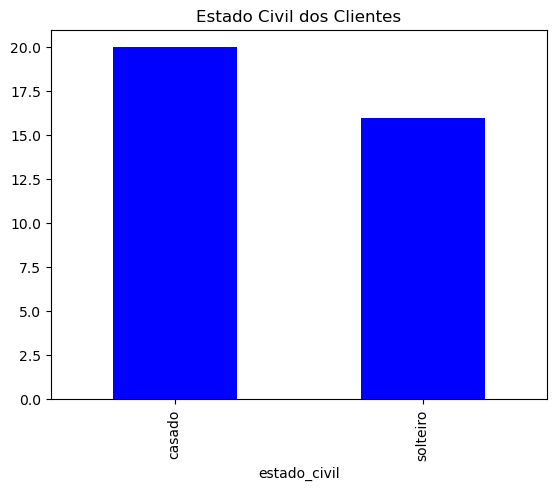

In [8]:
#plotando o grafico de barras
barplot = tab_abs.plot(kind='bar', color='blue', title='Estado Civil dos Clientes')

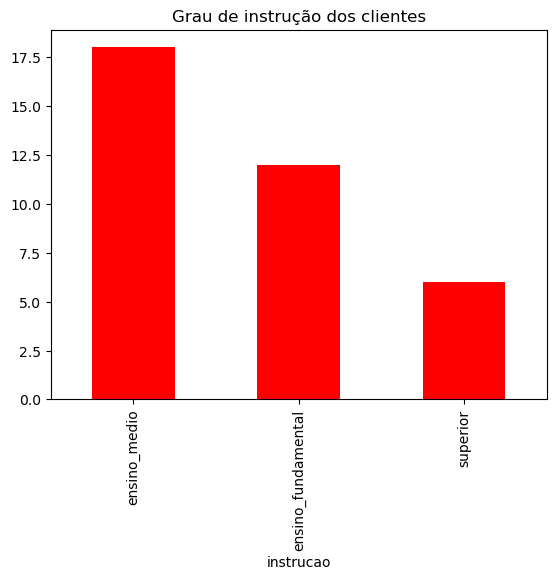

In [ ]:
#plotando grafico de barra de instrucao
barplot2 = data['instrucao'].value_counts().plot(kind='bar', color='red', title='Grau de instrução dos clientes')


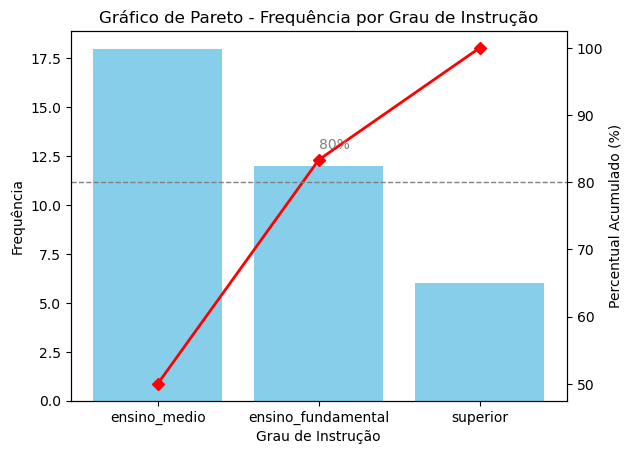

In [18]:
# Contar a frequência de cada grau de instrução
pareto_data = data['instrucao'].value_counts().sort_values(ascending=False).reset_index()
pareto_data.columns = ['instrucao', 'frequencia']

# Calcular o percentual acumulado
pareto_data['percentual_acumulado'] = pareto_data['frequencia'].cumsum() / pareto_data['frequencia'].sum() * 100

# Configuração do gráfico
fig, ax1 = plt.subplots()

# Gráfico de barras para a frequência de cada grau de instrução
ax1.bar(pareto_data['instrucao'], pareto_data['frequencia'], color='skyblue')
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Grau de Instrução')

# Adicionar gráfico de linha para o percentual acumulado
ax2 = ax1.twinx()  # Eixo secundário para o percentual acumulado
ax2.plot(pareto_data['instrucao'], pareto_data['percentual_acumulado'], color='red', marker='D', linestyle='-', linewidth=2)
ax2.set_ylabel('Percentual Acumulado (%)')

# Adicionar uma linha horizontal de referência para os 80%
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)
ax2.annotate('80%', xy=(0.9, 80), xytext=(1, 85), color='gray', fontsize=10)  # anotação para a linha de 80%

# Exibir o gráfico com título
plt.title('Gráfico de Pareto - Frequência por Grau de Instrução')
plt.show()
